<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [1]:
import pandas as pd

%matplotlib inline

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file, index_col = 0)
df.head()

,Pu238,Pu239,Pu240,Pu241
1,0.126,75.804,21.204,2.180
2,0.133,75.515,21.408,2.240
3,0.127,75.175,21.668,2.305
4,0.156,78.872,18.428,1.906
5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [3]:
df.drop(columns = ['Pu238', 'Pu241'], inplace = True)

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=3)

In [6]:
model = kmeans.fit(df)

### Assign clusters assignments (predictions) back to the original dataframe

In [7]:
df['predicted'] = model.labels_

In [8]:
df.head()

,Pu239,Pu240,predicted
1,75.804,21.204,2
2,75.515,21.408,2
3,75.175,21.668,2
4,78.872,18.428,2
5,73.317,20.223,0


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [9]:
import matplotlib.pyplot as plt

<Figure size 1080x720 with 0 Axes>

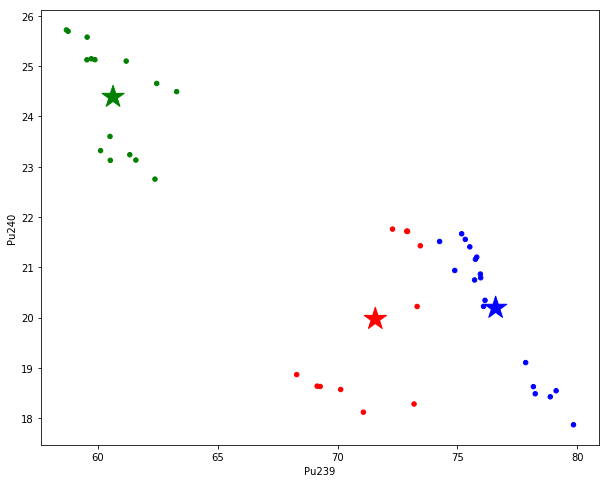

In [10]:
centroids = pd.DataFrame(model.cluster_centers_, columns = ['Pu239', 'Pu240'])

plt.figure(figsize=(15, 10))
colors = ["red", "green", "blue"]
df['color'] = df['predicted'].map(lambda p: colors[p])


ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
)

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

## Not quite sure where/how this went wrong

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()
scaled_array = ss.fit_transform(df.select_dtypes(include=float))

In [13]:
kmeans_2 = KMeans(n_clusters = 3)
model_scaled = kmeans_2.fit(scaled_array)

<Figure size 1080x720 with 0 Axes>

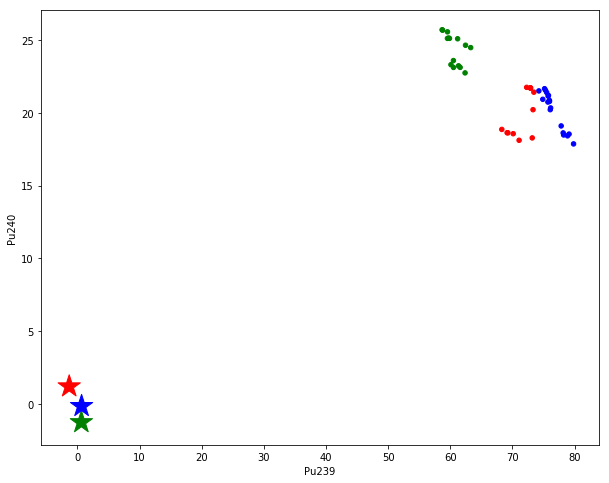

In [14]:
centroids = pd.DataFrame(model_scaled.cluster_centers_, columns = ['Pu239', 'Pu240'])

plt.figure(figsize=(15, 10))
colors = ["red", "green", "blue"]
df['color'] = df['predicted'].map(lambda p: colors[p])


ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
)

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [16]:
from sklearn.metrics import silhouette_score

array([[75.804, 21.204, 2, 'blue'],
       [75.515, 21.408, 2, 'blue'],
       [75.175, 21.668000000000003, 2, 'blue'],
       [78.872, 18.428, 2, 'blue'],
       [73.317, 20.223, 0, 'red'],
       [79.116, 18.548, 2, 'blue'],
       [75.751, 21.162, 2, 'blue'],
       [75.32600000000001, 21.557, 2, 'blue'],
       [63.287, 24.493000000000002, 1, 'green'],
       [59.553000000000004, 25.576, 1, 'green'],
       [58.688, 25.719, 1, 'green'],
       [58.758, 25.691999999999997, 1, 'green'],
       [59.728, 25.146, 1, 'green'],
       [59.544, 25.125999999999998, 1, 'green'],
       [59.876999999999995, 25.128, 1, 'green'],
       [61.181999999999995, 25.1, 1, 'green'],
       [78.244, 18.488, 2, 'blue'],
       [78.166, 18.629, 2, 'blue'],
       [74.25399999999999, 21.515, 2, 'blue'],
       [79.84, 17.872, 2, 'blue'],
       [62.455, 24.656, 1, 'green'],
       [73.189, 18.285, 0, 'red'],
       [75.968, 20.794, 2, 'blue'],
       [75.957, 20.866999999999997, 2, 'blue'],
       [72.885

In [20]:
#df[['Pu239', 'Pu240']].values

array([[75.804, 21.204],
       [75.515, 21.408],
       [75.175, 21.668],
       [78.872, 18.428],
       [73.317, 20.223],
       [79.116, 18.548],
       [75.751, 21.162],
       [75.326, 21.557],
       [63.287, 24.493],
       [59.553, 25.576],
       [58.688, 25.719],
       [58.758, 25.692],
       [59.728, 25.146],
       [59.544, 25.126],
       [59.877, 25.128],
       [61.182, 25.1  ],
       [78.244, 18.488],
       [78.166, 18.629],
       [74.254, 21.515],
       [79.84 , 17.872],
       [62.455, 24.656],
       [73.189, 18.285],
       [75.968, 20.794],
       [75.957, 20.867],
       [72.885, 21.718],
       [72.907, 21.721],
       [72.919, 21.713],
       [76.089, 20.225],
       [70.129, 18.573],
       [69.273, 18.633],
       [69.147, 18.64 ],
       [68.294, 18.869],
       [71.076, 18.122],
       [75.714, 20.75 ],
       [76.15 , 20.345],
       [77.845, 19.108],
       [62.382, 22.754],
       [60.112, 23.32 ],
       [60.519, 23.128],
       [61.585, 23.133],


In [22]:
silhouette_score(df[['Pu239', 'Pu240']].values, df['predicted'])

0.5950619279181214

In [23]:
## NOT TOO BAD